# Setup 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
%matplotlib inline

In [133]:
X, y = datasets.make_blobs(n_samples = 100, n_features = 2, random_state = 10)
y[y==2] = 1 #binary dataset

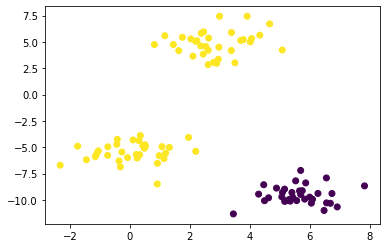

In [134]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

# Decision tree 

Splitting the training set in a way that produces the purest subsets.

Gini impurity

$$
G_{i} = 1 - \sum_{k=1}^{m} p_{i,k}^{2}
$$

In [135]:
def gini(y):
    dist = (np.bincount(y) / len(y)) ** 2
    return 1 - sum(dist)

In [136]:
a = np.array([0,1,2,3])
gini(a)

0.75

In [137]:
data = np.c_[X,y]

In [138]:
data

array([[ -2.32496308,  -6.6999964 ,   1.        ],
       [  0.51856831,  -4.90086804,   1.        ],
       [  2.44301805,   3.84652646,   1.        ],
       [  5.82662285,  -9.92259335,   0.        ],
       [  2.03300209,   5.28990817,   1.        ],
       [  3.37979515,   4.18880872,   1.        ],
       [  6.04774884, -10.30504657,   0.        ],
       [ -0.42084194,  -4.24889336,   1.        ],
       [  3.78067293,   5.22062163,   1.        ],
       [  5.69248303,  -7.19999368,   0.        ],
       [  5.15909568, -10.13427003,   0.        ],
       [  1.16464321,   5.59667831,   1.        ],
       [  2.94601402,   3.3575069 ,   1.        ],
       [  1.1882891 ,  -5.56058781,   1.        ],
       [ -0.31748917,  -6.86337766,   1.        ],
       [  4.32968132,   5.64396726,   1.        ],
       [  4.28981065,  -9.44982413,   0.        ],
       [  3.49996332,   3.02156553,   1.        ],
       [  5.31414039,  -9.94714146,   0.        ],
       [  2.61105267,   4.22218

In [139]:
curr_df = pd.DataFrame(data)
curr_df.columns = ["f0","f1","y"]

In [140]:
curr_df

,f0,f1,y
0,-2.324963,-6.699996,1.0
1,0.518568,-4.900868,1.0
2,2.443018,3.846526,1.0
3,5.826623,-9.922593,0.0
4,2.033002,5.289908,1.0
...,...,...,...
95,-0.736931,-4.957402,1.0
96,2.790440,3.068621,1.0
97,4.486980,-10.074298,0.0
98,6.268638,-9.381380,0.0


In [141]:
def get_entropy(vals):
    p = np.mean(vals)
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [142]:
def get_entropy_from_split(df, feature, val):
    left_types = df[df[feature] < val].y
    right_types = df[df[feature] >= val].y
    
    left_entropy = get_entropy(left_types)
    right_entropy = get_entropy(right_types)
    
    left_prop = len(left_types) / len(df)
    right_prop = len(right_types) / len(df)
    
    return left_prop*left_entropy + right_prop*right_entropy

In [143]:
features = ['f0', 'f1']
best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'f1', 'val': -7.128333308710893, 'entropy': 0.06551168990562285}
